In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('enviro_data.csv', names=['DTG', 'temp', 'humidity', 'baro_pressure', 'co_2', 'tvoc', 'uv_raw', 
                                           'amb_raw', 'uv_idx', 'lux','violet', 'indigo', 'blue', 'cyan', 'green', 
                                           'yellow', 'orange', 'red', 'loc_class'])

In [3]:
df.head()

DTG    temp  humidity  baro_pressure  co_2  tvoc  uv_raw  \
0  2021-08-04 10:57:52  28.568    42.925       1020.728   400     0      98   
1  2021-08-04 10:57:54  28.612    42.682       1020.742   400     0      99   
2  2021-08-04 10:57:56  28.619    42.151       1020.720   400     0      99   
3  2021-08-04 10:57:58  28.595    41.746       1020.713   400     0      99   
4  2021-08-04 10:58:00  28.629    41.451       1020.549   400     0      54   

   amb_raw  uv_idx      lux  violet  indigo   blue   cyan  green  yellow  \
0    59186   4.090  47338.4   65535   65535  65535  65535  65535   65535   
1    59865   4.132  47916.8   65535   65535  65535  65535  65535   65535   
2    60124   4.216  48069.6   65535   65535  65535  65535  65535   65535   
3    59416   4.090  46434.4   65535   65535  65535  65535  65535   65535   
4    27978   2.254  23488.8   56330   65535  65535  65535  65535   65535   

   orange    red loc_class  
0   65535  65535      blue  
1   65535  65535      blue  
2   65535  65535      blue  
3   65535  65535      blue  
4   65535  65535      blue

In [4]:
df.shape

(7063, 19)

In [5]:
df.groupby('loc_class').count()

DTG  temp  humidity  baro_pressure  co_2  tvoc  uv_raw  amb_raw  \
loc_class                                                                     
blue       2331  2331      2331           2331  2331  2331    2331     2331   
green      2334  2334      2334           2334  2334  2334    2334     2334   
yellow     2398  2398      2398           2398  2398  2398    2398     2398   

           uv_idx   lux  violet  indigo  blue  cyan  green  yellow  orange  \
loc_class                                                                    
blue         2331  2331    2331    2331  2331  2331   2331    2331    2331   
green        2334  2334    2334    2334  2334  2334   2334    2334    2334   
yellow       2398  2398    2398    2398  2398  2398   2398    2398    2398   

            red  
loc_class        
blue       2331  
green      2334  
yellow     2398

<AxesSubplot:>

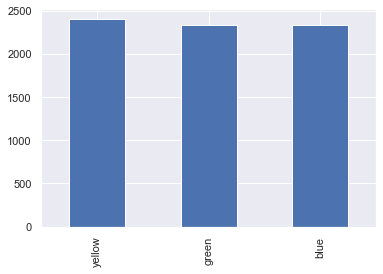

In [6]:
df.loc_class.value_counts().plot(kind='bar')

In [7]:
df.isna().sum().sum()

0

In [8]:
df.describe()

temp     humidity  baro_pressure    co_2         tvoc  \
count  7063.000000  7063.000000    7063.000000  7063.0  7063.000000   
mean     26.191886    58.995500    1020.015647   400.0     1.659493   
std       3.076573    12.416298       1.682914     0.0    18.117337   
min      21.144000    38.754000    1016.936000   400.0     0.000000   
25%      23.402500    48.746500    1018.647000   400.0     0.000000   
50%      26.154000    57.917000    1019.685000   400.0     0.000000   
75%      28.467500    67.964000    1021.143000   400.0     0.000000   
max      33.730000    87.999000    1024.602000   400.0   500.000000   

            uv_raw       amb_raw       uv_idx           lux        violet  \
count  7063.000000   7063.000000  7063.000000   7063.000000   7063.000000   
mean     13.499363   8321.573977     0.562351   6660.220643  22933.570296   
std      22.050911  12625.957711     0.914767  10104.448914  25770.155800   
min       0.000000      0.000000     0.000000      0.000000      0.000000   
25%       0.000000    213.000000     0.000000    170.800000    388.000000   
50%       4.000000   2502.000000     0.167000   2004.000000  11653.000000   
75%      17.000000  11629.500000     0.710000   9325.200000  48233.000000   
max     192.000000  65535.000000     8.473000  52428.000000  65535.000000   

             indigo          blue          cyan         green        yellow  \
count   7063.000000   7063.000000   7063.000000   7063.000000   7063.000000   
mean   26517.548209  29374.669970  31157.429563  31966.256265  32628.173722   
std    27607.799005  28867.461952  29576.518081  28902.111017  28834.575416   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      682.500000    990.000000   1182.500000   3307.500000   3861.000000   
50%    17145.000000  23312.000000  27953.000000  27040.000000  28834.000000   
75%    63489.000000  65535.000000  65535.000000  65535.000000  65535.000000   
max    65535.000000  65535.000000  65535.000000  65535.000000  65535.000000   

             orange           red  
count   7063.000000   7063.000000  
mean   34442.679456  33761.037095  
std    29219.053414  30564.267587  
min        0.000000      0.000000  
25%     4423.000000   1322.000000  
50%    38553.000000  42404.000000  
75%    65535.000000  65535.000000  
max    65535.000000  65535.000000

In [9]:
df.isnull().sum()

DTG              0
temp             0
humidity         0
baro_pressure    0
co_2             0
tvoc             0
uv_raw           0
amb_raw          0
uv_idx           0
lux              0
violet           0
indigo           0
blue             0
cyan             0
green            0
yellow           0
orange           0
red              0
loc_class        0
dtype: int64

In [10]:
df.duplicated().sum()

0

/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


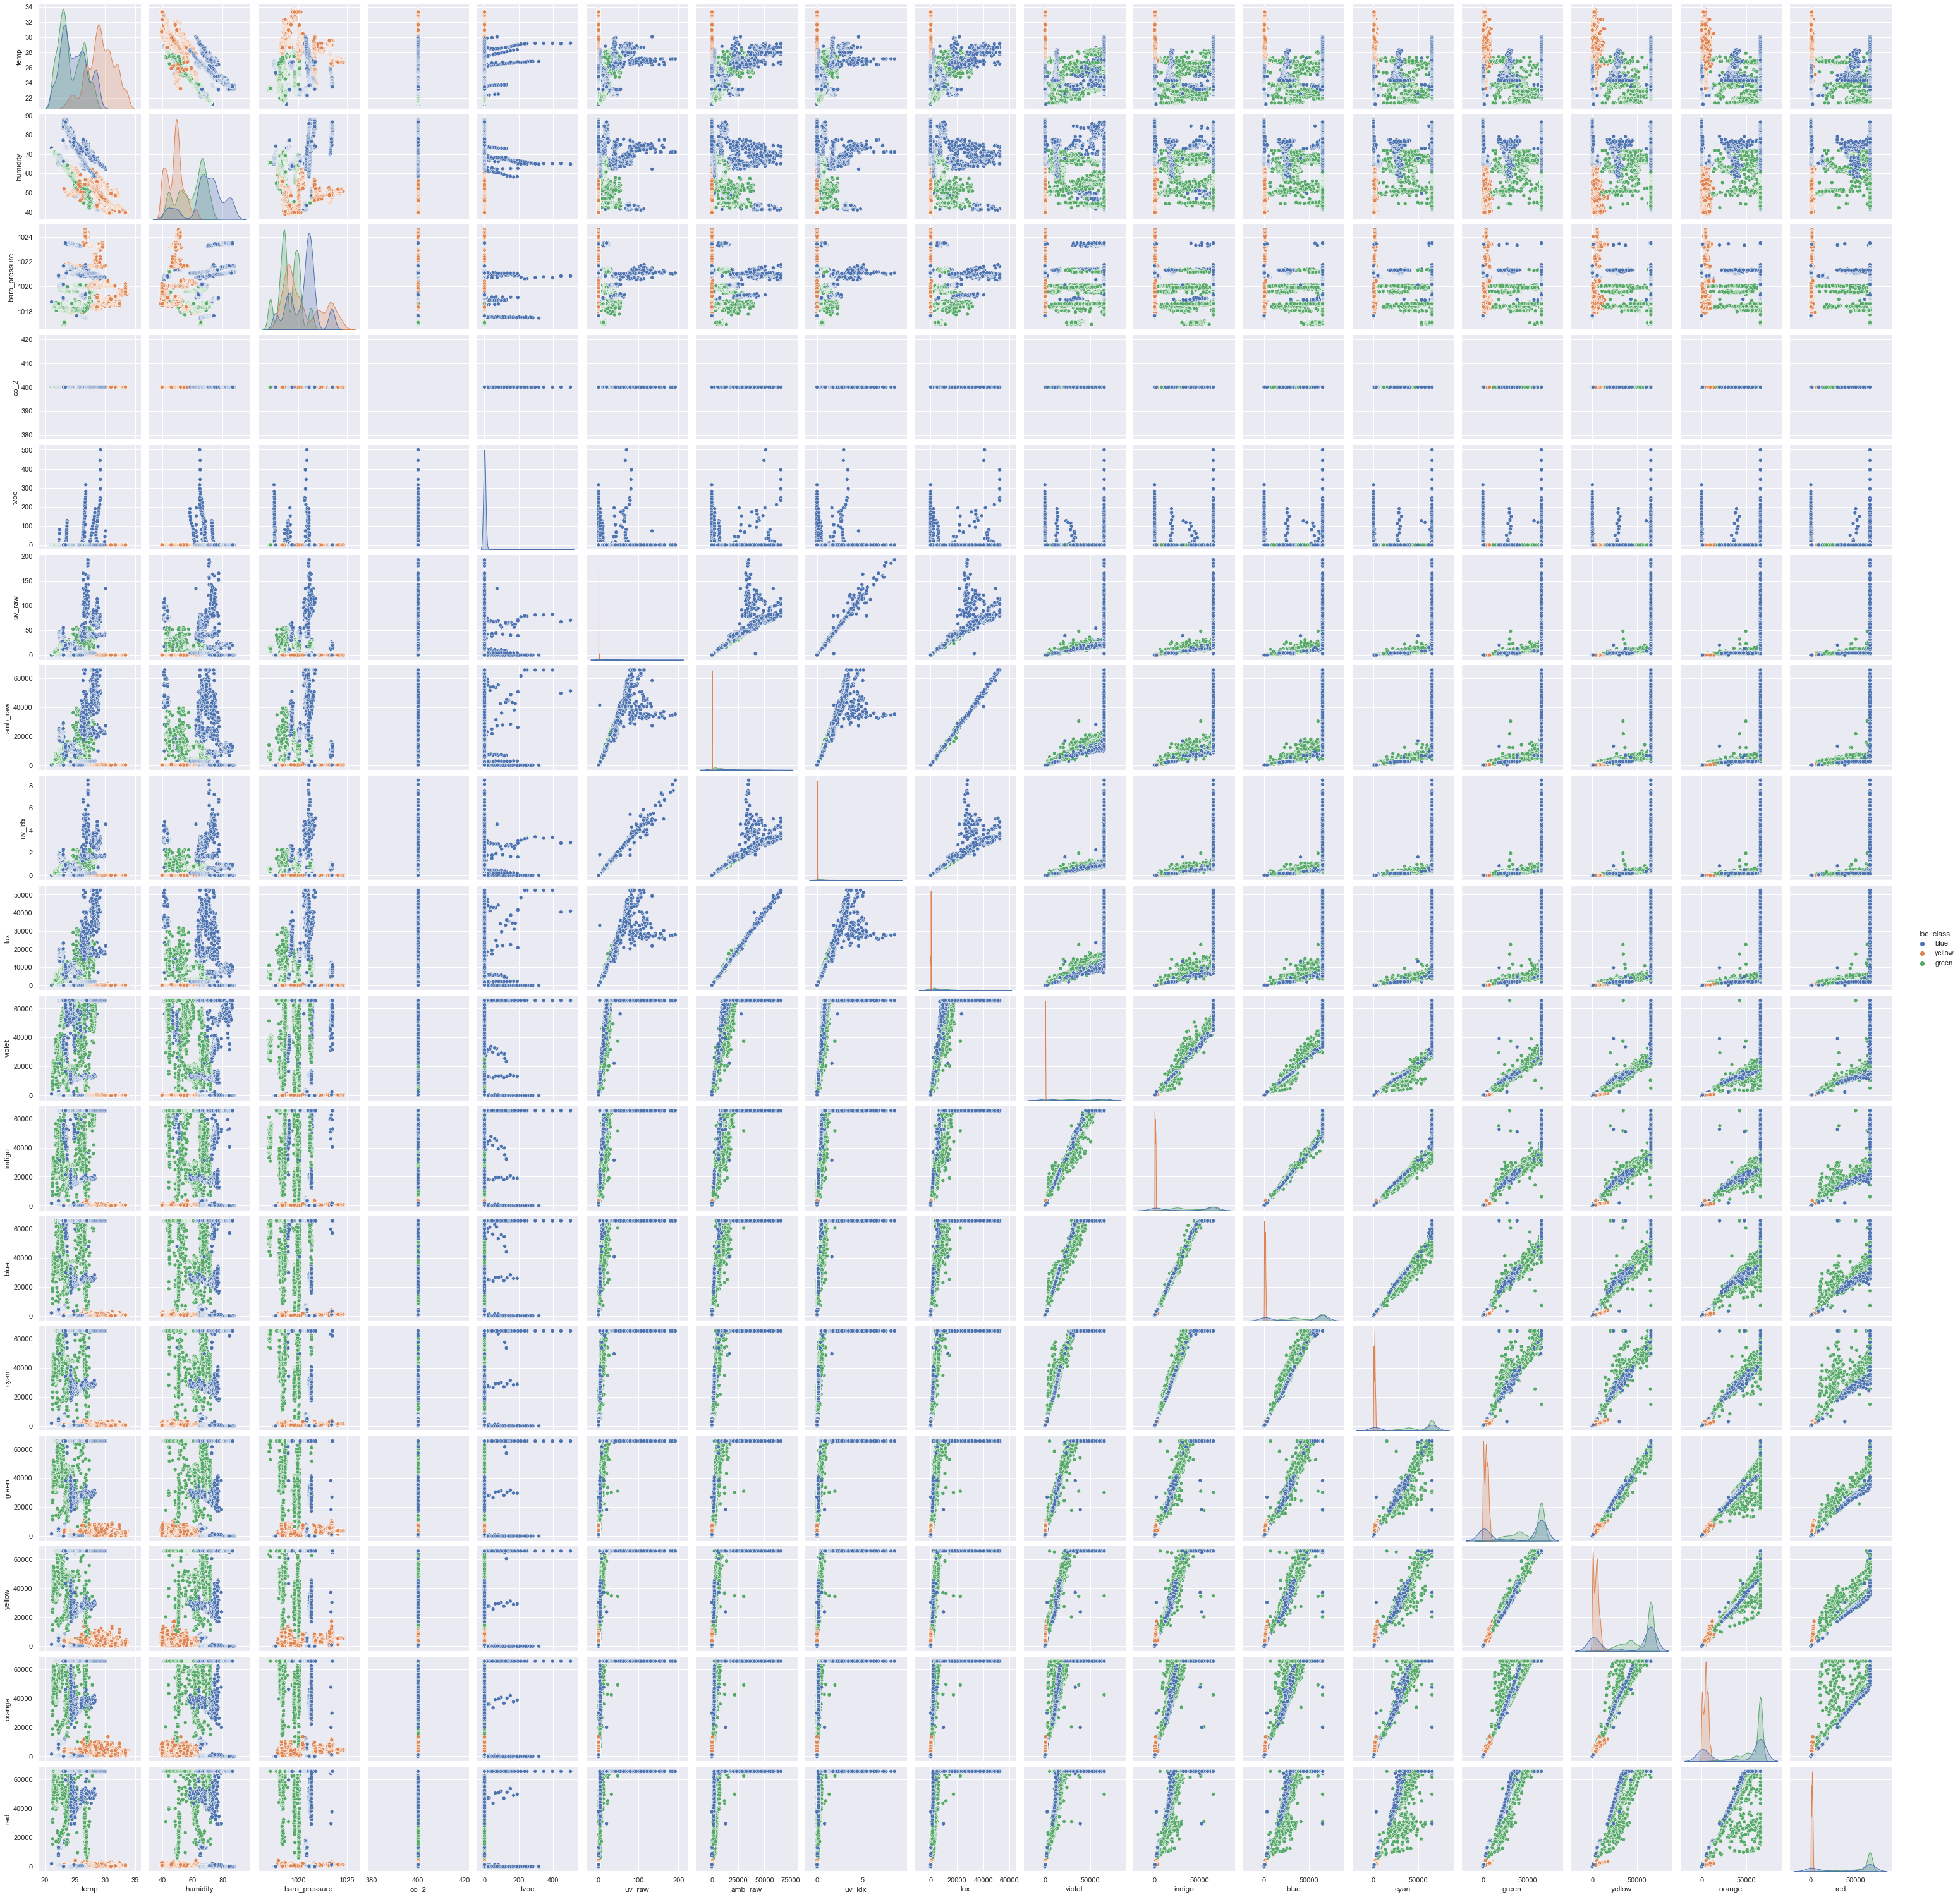

In [20]:
sns.pairplot(df, hue='loc_class')

In [11]:
df.columns

Index(['DTG', 'temp', 'humidity', 'baro_pressure', 'co_2', 'tvoc', 'uv_raw',
       'amb_raw', 'uv_idx', 'lux', 'violet', 'indigo', 'blue', 'cyan', 'green',
       'yellow', 'orange', 'red', 'loc_class'],
      dtype='object')

In [12]:
ind_vars = ['temp', 'humidity', 'baro_pressure', 'co_2', 'tvoc','uv_idx', 'lux', 'violet', 'indigo', 'blue', 'cyan', 'green',
       'yellow', 'orange', 'red']

X = df[ind_vars]

y = df['loc_class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [14]:
X_train.shape

(5650, 15)

In [15]:
y_test.shape

(1413,)

In [16]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [17]:
model.fit(X_train, y_train)

/Users/atsukosakurai/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [18]:
y_pred = model.predict(X_test)
y_pred

array(['green', 'green', 'yellow', ..., 'green', 'green', 'green'],
      dtype=object)

In [19]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba.round(2)

array([0.96, 0.64, 0.  , ..., 0.75, 1.  , 1.  ])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8655343241330502


In [21]:
print(metrics.confusion_matrix(y_test, y_pred))

[[385  96   1]
 [ 79 382   2]
 [ 12   0 456]]


In [22]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        blue      0.809     0.799     0.804       482
       green      0.799     0.825     0.812       463
      yellow      0.993     0.974     0.984       468

    accuracy                          0.866      1413
   macro avg      0.867     0.866     0.866      1413
weighted avg      0.867     0.866     0.866      1413



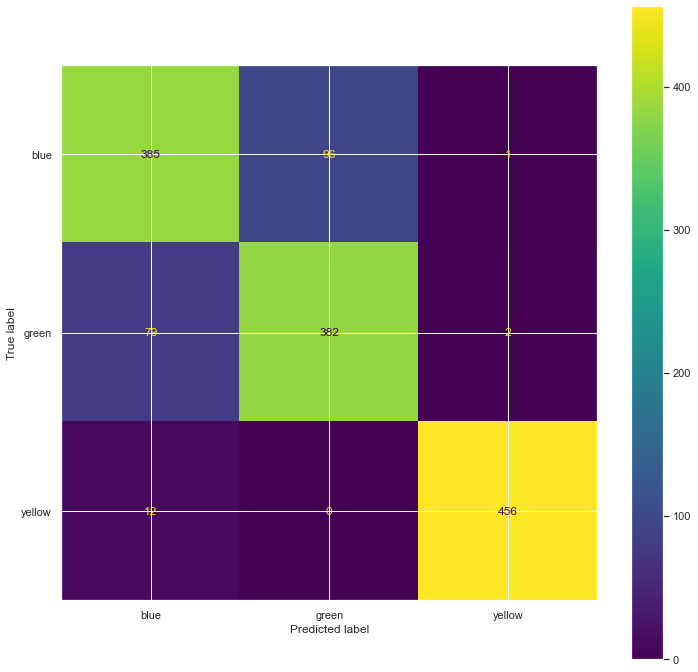

In [60]:
fig, ax = plt.subplots(figsize=(12,12))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)